# Data preprocessing

In [1]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
from matplotlib import pyplot as plt  # For creating visualizations
import numpy as np  # For numerical operations
import tensorflow as tf  # For machine learning using TensorFlow
%matplotlib inline
# Display matplotlib plots inline in Jupyter notebooks

# Suppress warnings to enhance code readability
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read data in csv file
df = pd.read_csv('./dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
# Randomly sample 5 rows from the DataFrame 'df'
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2703,4749-VFKVB,Female,0,No,No,1,Yes,Yes,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.1,50.1,Yes
4311,2187-LZGPL,Female,0,No,No,7,No,No phone service,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic),40.1,293.3,Yes
1956,0019-EFAEP,Female,0,No,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Two year,Yes,Bank transfer (automatic),101.3,7261.25,No
1806,8966-KZXXA,Male,0,Yes,Yes,36,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),25.1,930.95,No
3570,6696-YDAYZ,Male,0,Yes,Yes,16,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.5,290.55,No


In [4]:
# Count the number of values in the DataFrame
df.Churn.value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [5]:
# Delete a column in the DataFrame
df.drop('customerID', axis='columns', inplace=True)

In [6]:
# Indicate the data type of each column
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
# Display the values in the specific column
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [9]:
df.TotalCharges[485:490]

485    6130.85
486       1415
487    6201.95
488           
489      74.35
Name: TotalCharges, dtype: object

In [10]:
# Display the shape (number of rows and columns) of the null data
df[df.TotalCharges.values == " "].shape

(11, 20)

In [11]:
# Select rows that are not null
df1 = df[df.TotalCharges.values != " "]
df1.shape

(7032, 20)

In [12]:
df1.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2457,Male,1,Yes,No,57,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,One year,Yes,Electronic check,90.65,5199.8,No
6731,Female,0,No,No,24,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.55,470.2,No
2067,Male,1,Yes,No,65,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45,No
2884,Female,1,Yes,Yes,72,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),90.15,6716.45,No
1435,Female,1,Yes,No,65,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),109.40,7227.45,No


In [13]:
# Convert to numeric
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

In [14]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

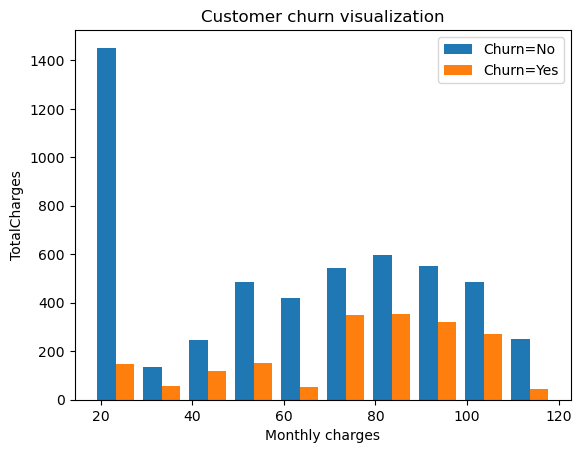

In [15]:
mc_churn_no = df1[df1.Churn == 'No'].MonthlyCharges # Take the MonthlyCharges column with Churn's value is 'No'
mc_churn_yes = df1[df1.Churn == 'Yes'].MonthlyCharges # Take the MonthlyCharges column with Churn's value is 'Yes'

plt.xlabel("Monthly charges") # Name for x axis
plt.ylabel("TotalCharges") # Name for y axis
plt.title("Customer churn visualization") # Titles of chart

plt.hist([mc_churn_no, mc_churn_yes], label=['Churn=No', 'Churn=Yes']) # Create a histogram
plt.legend()

In [16]:
# Used to print unique values in each column
def print_unique_values(df):
    for col in df:
        print(f"{col}: {df[col].unique()}")

In [17]:
print_unique_values(df1)

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:

In [18]:
# Replace a string with other string in Dataframe
df1.replace('No phone service', 'No', inplace=True)
df1.replace('No internet service', 'No', inplace=True)

In [19]:
print_unique_values(df1)

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: ['No' 'Yes']


In [20]:
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

for col in yes_no_columns:
    df1[col].replace({'Yes' : 1, 'No' : 0}, inplace=True)

In [21]:
print_unique_values(df1)

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [22]:
df1['gender'].replace({'Female' : 1, 'Male' : 0}, inplace=True)

In [23]:
print_unique_values(df1)

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [24]:
# One hot encoder
df2 = pd.get_dummies(data=df1, columns=['InternetService', 'Contract', 'PaymentMethod']).astype(int)

In [25]:
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,1,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,1,0,1,1,11,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,4,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [26]:
print_unique_values(df2)

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
PaperlessBilling: [1 0]
MonthlyCharges: [ 29  56  53  42  70  99  89 104  49  18 100 103 105 113  20 106  55  90
  39  19  59  30  64  96  95  66  45  69  74  97  79  76  84  80 108  24
 107  54  94  75  78 111 110  25  50  62  33  82  21  98  57  91  31  85
  88  23  58  35  44  71 101  68  86  73  81  51 109 112 102  46  93  65
  48  40  83 115 114  41  61  60  67  72  87  92 116  43  28  63  47  34
  26  52  77  36  38 118 117  22  37]
TotalCharges: [  29 1889  108 ... 1990 7362 6844]
Churn: [0 1]
InternetService_DSL: [1 0]
Int

In [27]:
cols_to_scales = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Used to scale values in range 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scales] = scaler.fit_transform(df2[cols_to_scales])

In [28]:
print_unique_values(df2)

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [29]:
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,0.323944,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,1,0,1,1,1.000000,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,1,0,1,1,0.140845,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,0.042254,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [30]:
# Used to split the dataset in to 2 parts (train - test)
from sklearn.model_selection import train_test_split

X = df2.drop('Churn', axis=1)
y = df2['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [31]:
X_train.shape

(5625, 26)

In [32]:
X_test.shape

(1407, 26)

# Training (Deep Learning)

## Deep Learning with imbalanced data

In [33]:
# Create an ANN model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(26, input_shape=(26,), activation='relu'), # Input layer
    tf.keras.layers.Dense(15, activation='relu'), # Hidden layer
    tf.keras.layers.Dense(1, activation='sigmoid') # Last layer
])

# ANN (artificial neutral network) - commonly used for binary classification problems
# CNN (convolution neutral network) - commonly used for image classification problems


# Compile the model with specified optimizer, loss function, and evaluation metrics
model.compile(optimizer='adam',  # Using the Adam optimizer for training the model
              loss='binary_crossentropy',  # Employing binary crossentropy as the loss function
              metrics=['accuracy'])  # Evaluating the model's performance based on accuracy

In [34]:
# Start training 
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 2s 3ms/step - loss: 0.5459 - accuracy: 0.7163
Epoch 2/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4375 - accuracy: 0.7870
Epoch 3/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4266 - accuracy: 0.7948
Epoch 4/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4244 - accuracy: 0.7970
Epoch 5/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4209 - accuracy: 0.7982
Epoch 6/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4185 - accuracy: 0.8032
Epoch 7/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4161 - accuracy: 0.8048
Epoch 8/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4145 - accuracy: 0.8044
Epoch 9/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4122 - accuracy: 0.8053
Epoch 10/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4110 - accura

In [35]:
# Evaluate the model's performance
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 3ms/step - loss: 0.4780 - accuracy: 0.7889


[0.4780135452747345, 0.7889125943183899]

In [36]:
yp = model.predict(X_test)
yp

44/44 [==============================] - 0s 1ms/step


array([[0.05642945],
       [0.14618976],
       [0.6798793 ],
       ...,
       [0.7637577 ],
       [0.5364784 ],
       [0.00387901]], dtype=float32)

In [37]:
y_pred = []

for i in yp:
    if i > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [38]:
print(y_pred[:10])
print(y_test[:10])

[0, 0, 1, 0, 1, 0, 1, 1, 0, 0]
6070    0
6319    0
1310    1
5947    1
5788    0
600     0
176     1
6667    1
5087    0
838     0
Name: Churn, dtype: int32


In [39]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1035
           1       0.61      0.57      0.59       372

    accuracy                           0.79      1407
   macro avg       0.73      0.72      0.72      1407
weighted avg       0.78      0.79      0.79      1407



## Deep Learning with augmented datasets

Handle imbalance dataset

In [40]:
# Split datafram into 2 parts (Churn = 0, Churn = 1)
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [41]:
# Handle imbalace data using oversampling method
df_class_1_over = df_class_1.sample(len(df_class_0), replace=True) # Make copies to obtain enough data, ensuring that classes 0 and 1 are equally
df_balanced = pd.concat([df_class_0, df_class_1_over], axis=0) # concatenate into a dataframe

df_balanced.Churn.value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64

In [42]:
# Prepare the dataset
X = df_balanced.drop('Churn',axis='columns')
y = df_balanced['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [43]:
y_train.value_counts()

Churn
1    4130
0    4130
Name: count, dtype: int64

In [44]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [45]:
model1.fit(X_train, y_train, epochs=100)

Epoch 1/100
259/259 [==============================] - 1s 4ms/step - loss: 0.5766 - accuracy: 0.7017
Epoch 2/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4950 - accuracy: 0.7648
Epoch 3/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4839 - accuracy: 0.7686
Epoch 4/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4792 - accuracy: 0.7692
Epoch 5/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4748 - accuracy: 0.7740
Epoch 6/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4712 - accuracy: 0.7738
Epoch 7/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4674 - accuracy: 0.7772
Epoch 8/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4655 - accuracy: 0.7785
Epoch 9/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4619 - accuracy: 0.7821
Epoch 10/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4588 - accura

In [46]:
model1.evaluate(X_train, y_train)

259/259 [==============================] - 1s 2ms/step - loss: 0.3612 - accuracy: 0.8326


[0.3611850142478943, 0.8325665593147278]

In [47]:
yp = model1.predict(X_test)
yp

y_pred = []

for i in yp:
    if i > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

65/65 [==============================] - 0s 2ms/step


In [48]:
print(y_pred[:10])
print(y_test[:10])

[1, 0, 1, 1, 0, 0, 1, 1, 0, 1]
3815    1
4731    0
5393    1
672     1
5034    0
3957    0
1238    1
2998    0
2965    1
258     1
Name: Churn, dtype: int32


In [49]:
# Save your model
model.save('./model1.h5')

# Other methods (Machine Learning) 💪

## Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [51]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [52]:
# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred_rf)
conf_matrix = confusion_matrix(y_test, y_pred_rf)
class_report = classification_report(y_test, y_pred_rf)

print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.8984
Confusion Matrix:
[[870 163]
 [ 47 986]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.84      0.89      1033
           1       0.86      0.95      0.90      1033

    accuracy                           0.90      2066
   macro avg       0.90      0.90      0.90      2066
weighted avg       0.90      0.90      0.90      2066



## SVM

In [53]:
from sklearn.svm import SVC

In [54]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train, y_train)

SVC()

In [56]:
# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred_svm)
conf_matrix = confusion_matrix(y_test, y_pred_svm)
class_report = classification_report(y_test, y_pred_svm)

print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.7817
Confusion Matrix:
[[765 268]
 [183 850]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.74      0.77      1033
           1       0.76      0.82      0.79      1033

    accuracy                           0.78      2066
   macro avg       0.78      0.78      0.78      2066
weighted avg       0.78      0.78      0.78      2066

